In [1]:
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt
import numpy as np
from ast import literal_eval

/home/veton/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
lextreme_datasets = ['brazilian_court_decisions_judgment', 'brazilian_court_decisions_unanimity', 'swiss_judgment_prediction', 'german_argument_mining', 'greek_legal_code_volume', 'greek_legal_code_chapter', 'greek_legal_code_subject', 'online_terms_of_service_unfairness_levels', 'online_terms_of_service_clause_topics', 'covid19_emergency_event', 'multi_eurlex_level_1', 'lener_br', 'legalnero', 'greek_legal_ner', 'mapa_coarse', 'mapa_fine']

In [3]:
def split_into_languages(dataset):
    dataset_new = list()
    
    dataset_df = pd.DataFrame(dataset)
    
    for item in dataset_df.to_dict(orient='records'):
        labels = item['label']
        for language, document in literal_eval(item['input']).items():
            if document is not None:
                item_new = dict()
                item_new['language']=language
                item_new['input']=str(document)
                item_new['label']=labels
                dataset_new.append(item_new)
    
    dataset_new = pd.DataFrame(dataset_new)
    
    
    return  dataset_new


def create_histogram(dataset_name):
    dataset = load_dataset("joelito/lextreme",dataset_name)

    all_data_as_df = list()

    for split in ['train','validation','test']:
        df = pd.DataFrame(dataset[split])
        all_data_as_df.append(df)
        

    all_data_as_df = pd.concat(all_data_as_df)
    
    if dataset_name.startswith('multi_eurlex'):
        all_data_as_df = split_into_languages(all_data_as_df)
        
    try:
        all_data_as_df['input_split']=all_data_as_df.input.apply(lambda x:str(x).split())
    except:
        all_data_as_df['input_split']=all_data_as_df.input.apply(lambda x:len(x))
    all_data_as_df['input_split_length']=all_data_as_df.input_split.apply(lambda x:len(x))

    plt.figure(figsize=(20,10))
    ax = all_data_as_df.input_split_length.plot.hist(grid=True)
    start, end = ax.get_xlim()
    ax.bis=round(end/20,0)
    ax.xaxis.set_ticks(np.arange(0, end, round(end/20,0)))
    plt.xlabel('Length of input', fontsize=16)
    plt.ylabel('Frequency of length value', fontsize=16)
    plt.title(dataset_name, fontsize=16)
    plt.savefig('histogram_'+'_'.join(dataset_name.split())+'.jpg')


Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/brazilian_court_decisions_judgment/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/brazilian_court_decisions_unanimity/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/swiss_judgment_prediction/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/german_argument_mining/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/greek_legal_code_volume/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/greek_legal_code_chapter/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/greek_legal_code_subject/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/online_terms_of_service_unfairness_levels/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/online_terms_of_service_clause_topics/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/covid19_emergency_event/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/multi_eurlex_level_1/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/lener_br/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Using custom data configuration joelito--legalnero-b5723d870cf52291


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /home/veton/.cache/huggingface/datasets/joelito___json/joelito--legalnero-b5723d870cf52291/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253. Subsequent calls will reuse this data.


Generating validation split: 0 examples [00:00, ? examples/s]

Using custom data configuration joelito--legalnero-b5723d870cf52291
Reusing dataset json (/home/veton/.cache/huggingface/datasets/joelito___json/joelito--legalnero-b5723d870cf52291/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253)


Generating test split: 0 examples [00:00, ? examples/s]

Using custom data configuration joelito--legalnero-b5723d870cf52291
Reusing dataset json (/home/veton/.cache/huggingface/datasets/joelito___json/joelito--legalnero-b5723d870cf52291/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253)


Dataset lextreme downloaded and prepared to /home/veton/.cache/huggingface/datasets/joelito___lextreme/legalnero/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Reusing dataset lextreme (/home/veton/.cache/huggingface/datasets/joelito___lextreme/greek_legal_ner/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5)


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Using custom data configuration joelito--mapa-7f8b5b2de97c5550


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /home/veton/.cache/huggingface/datasets/joelito___json/joelito--mapa-7f8b5b2de97c5550/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253. Subsequent calls will reuse this data.


Generating validation split: 0 examples [00:00, ? examples/s]

Using custom data configuration joelito--mapa-7f8b5b2de97c5550
Reusing dataset json (/home/veton/.cache/huggingface/datasets/joelito___json/joelito--mapa-7f8b5b2de97c5550/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253)


Generating test split: 0 examples [00:00, ? examples/s]

Using custom data configuration joelito--mapa-7f8b5b2de97c5550
Reusing dataset json (/home/veton/.cache/huggingface/datasets/joelito___json/joelito--mapa-7f8b5b2de97c5550/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253)


Dataset lextreme downloaded and prepared to /home/veton/.cache/huggingface/datasets/joelito___lextreme/mapa_coarse/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Using custom data configuration joelito--mapa-7f8b5b2de97c5550
Reusing dataset json (/home/veton/.cache/huggingface/datasets/joelito___json/joelito--mapa-7f8b5b2de97c5550/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253)


Generating validation split: 0 examples [00:00, ? examples/s]

Using custom data configuration joelito--mapa-7f8b5b2de97c5550
Reusing dataset json (/home/veton/.cache/huggingface/datasets/joelito___json/joelito--mapa-7f8b5b2de97c5550/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253)


Generating test split: 0 examples [00:00, ? examples/s]

Using custom data configuration joelito--mapa-7f8b5b2de97c5550
Reusing dataset json (/home/veton/.cache/huggingface/datasets/joelito___json/joelito--mapa-7f8b5b2de97c5550/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253)


Dataset lextreme downloaded and prepared to /home/veton/.cache/huggingface/datasets/joelito___lextreme/mapa_fine/1.0.0/14697fe76aebeca2a6a3c25166bd6eb61f769e4ad7a19bd520634691a4f70bc5. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

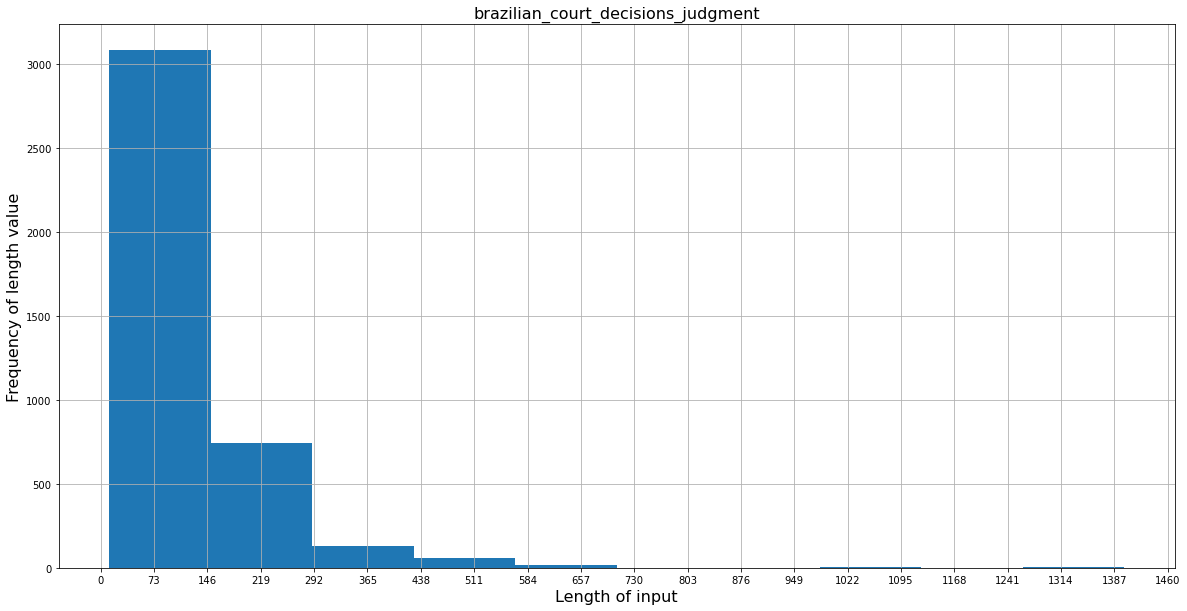

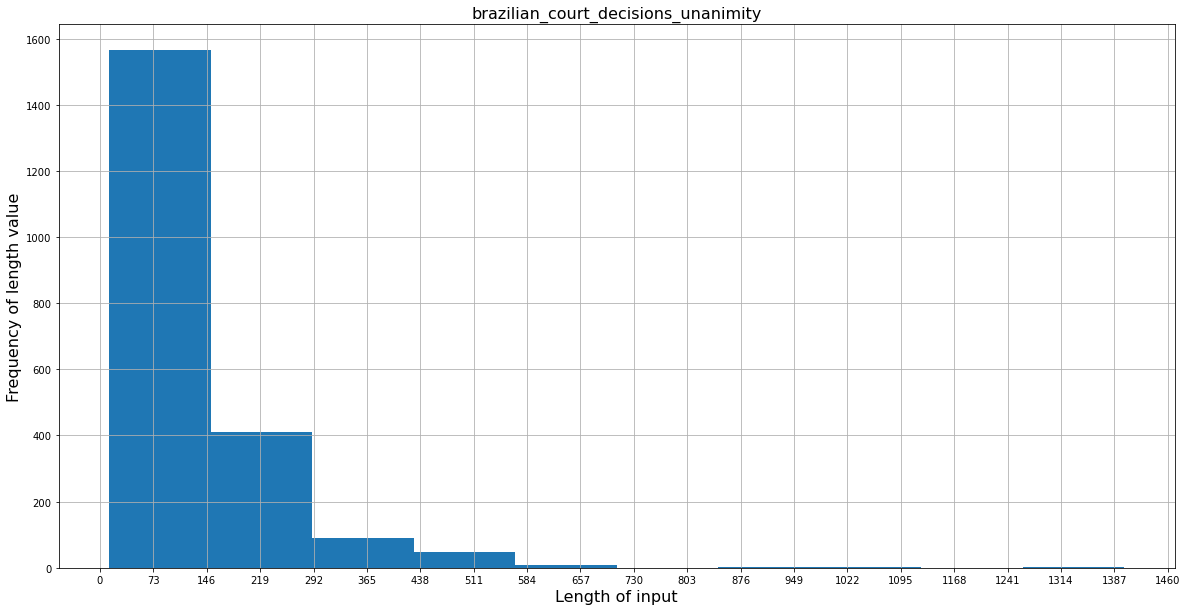

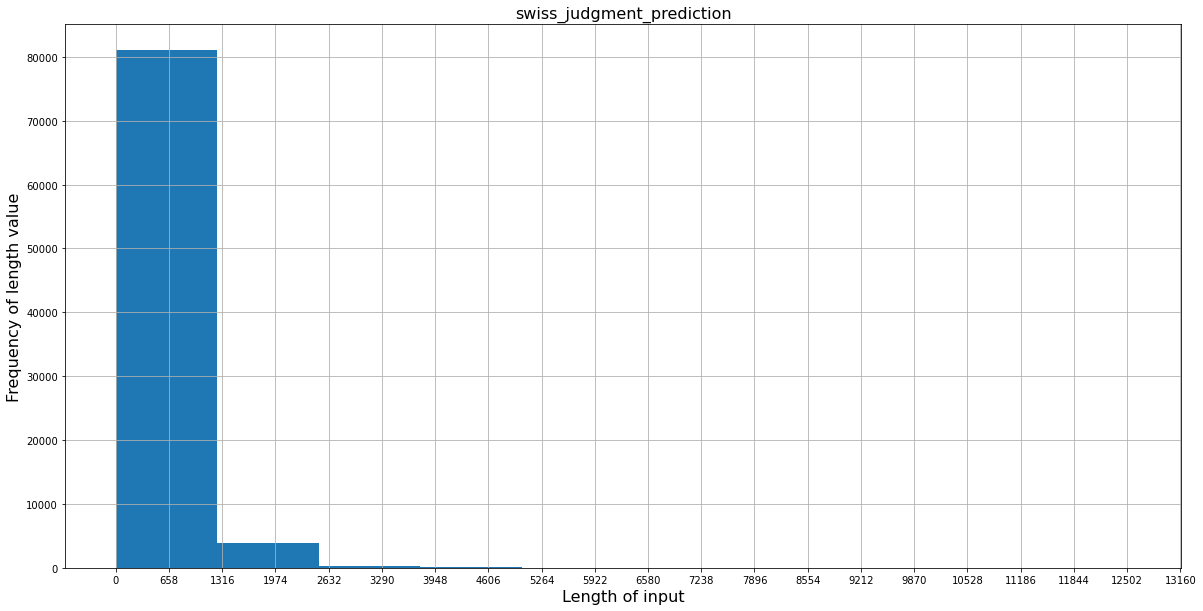

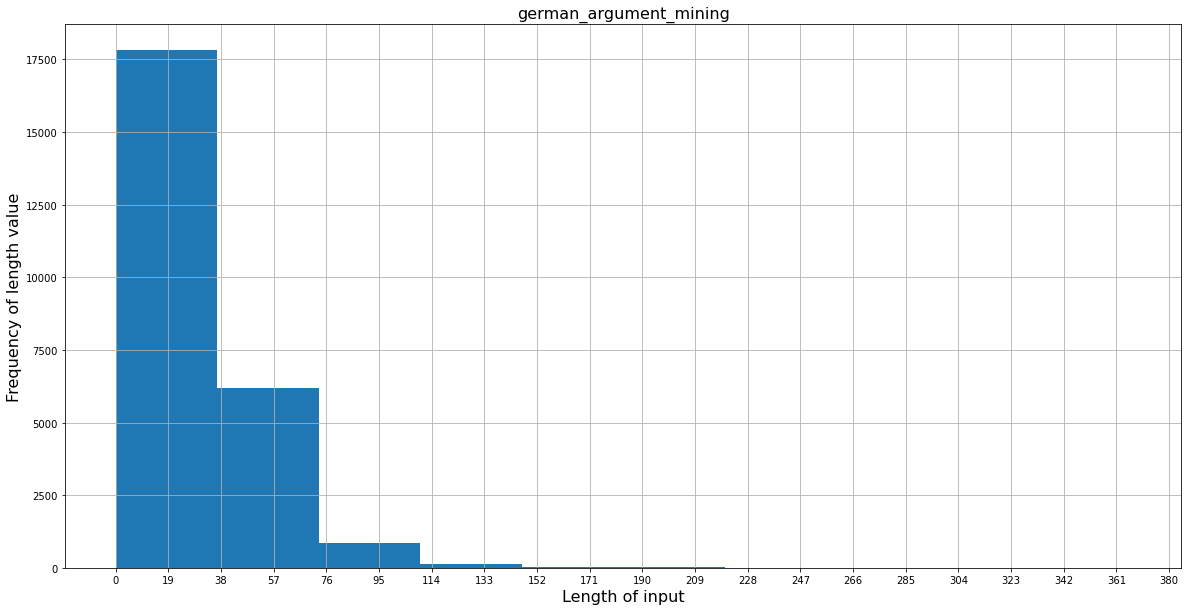

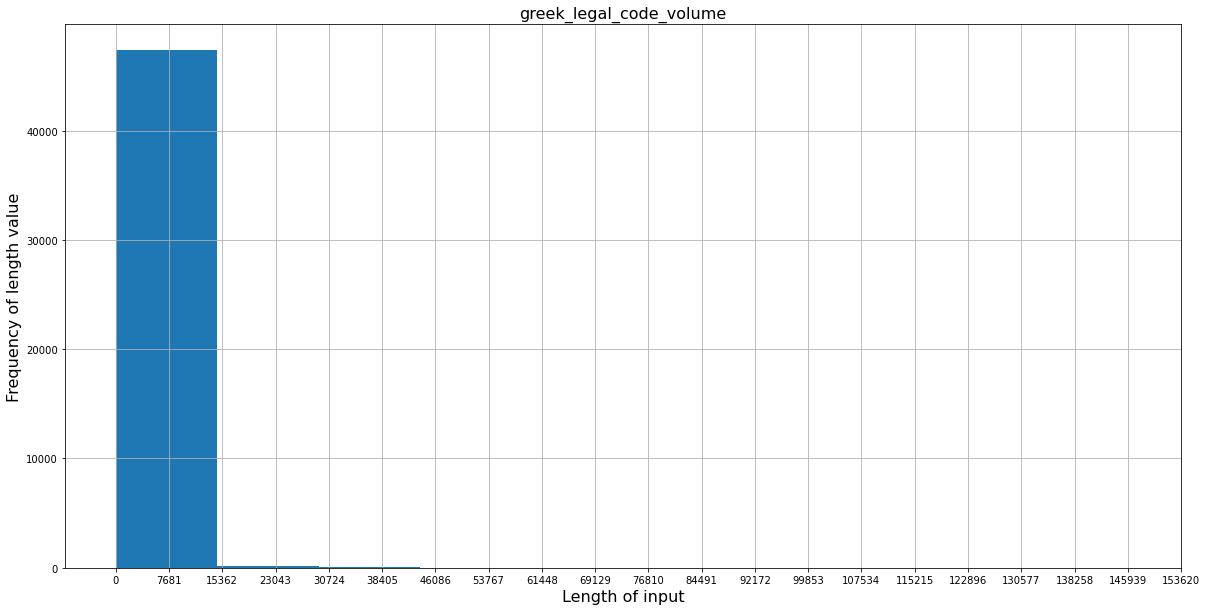

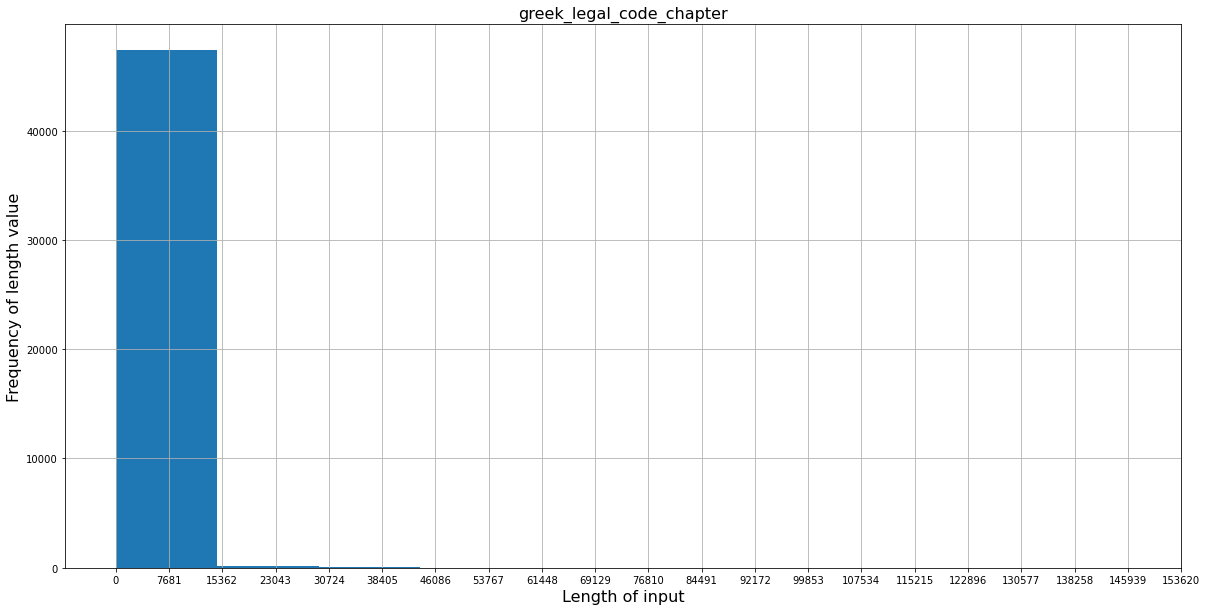

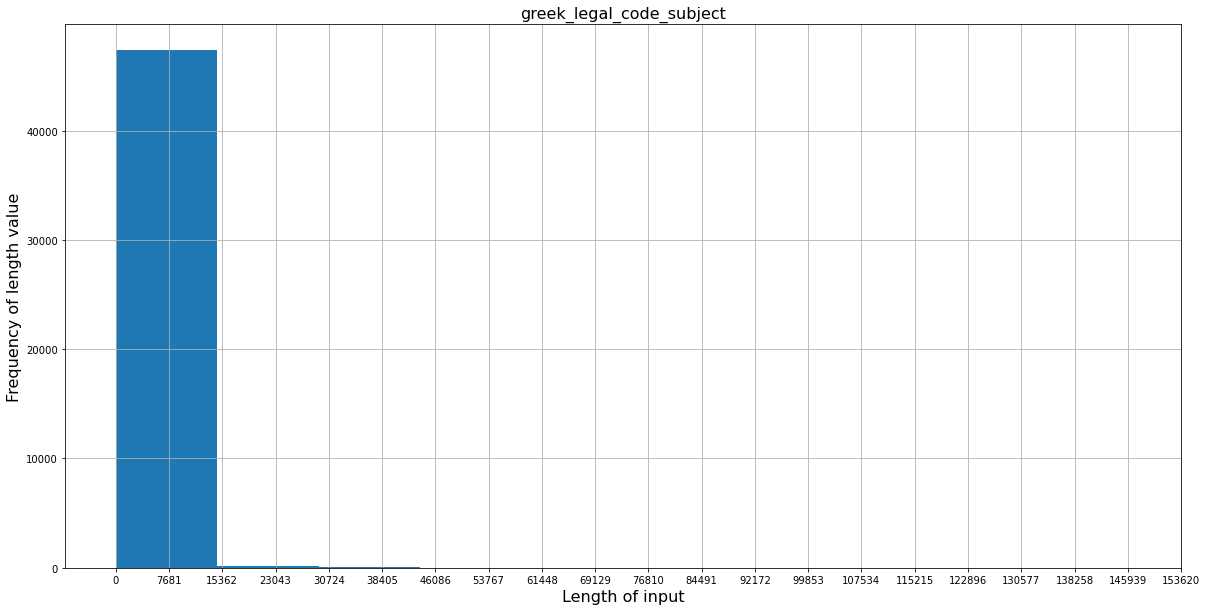

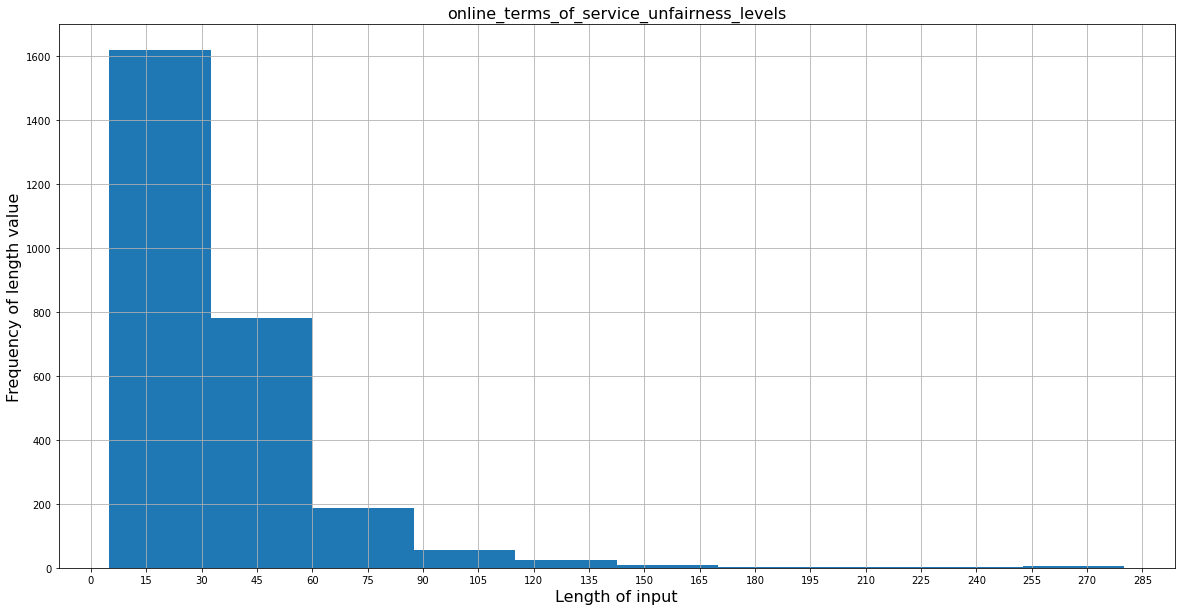

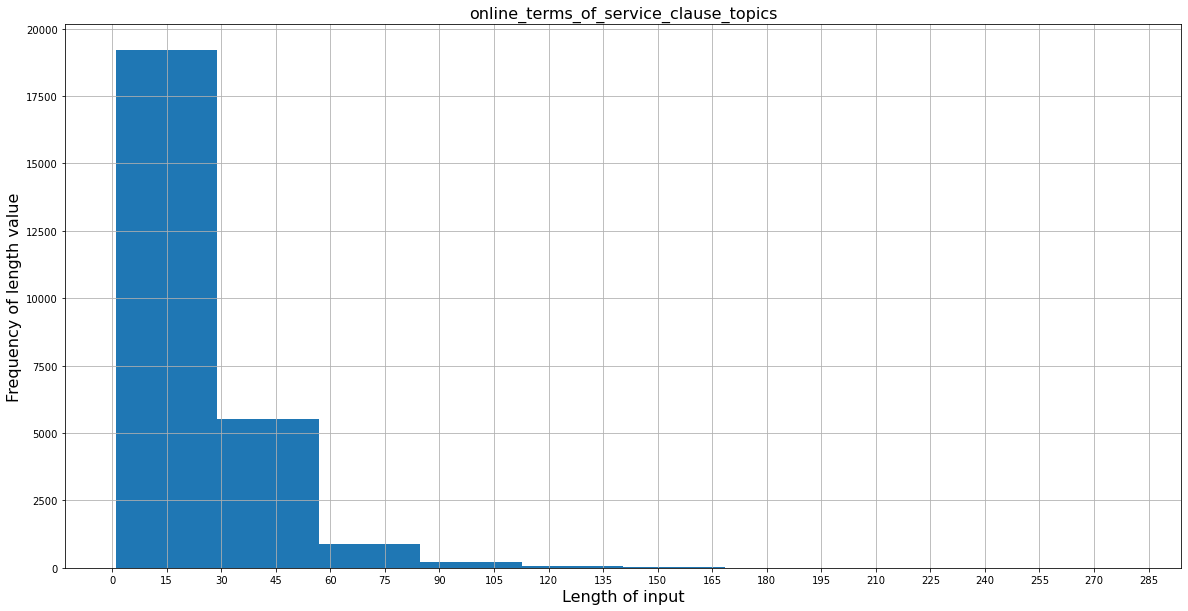

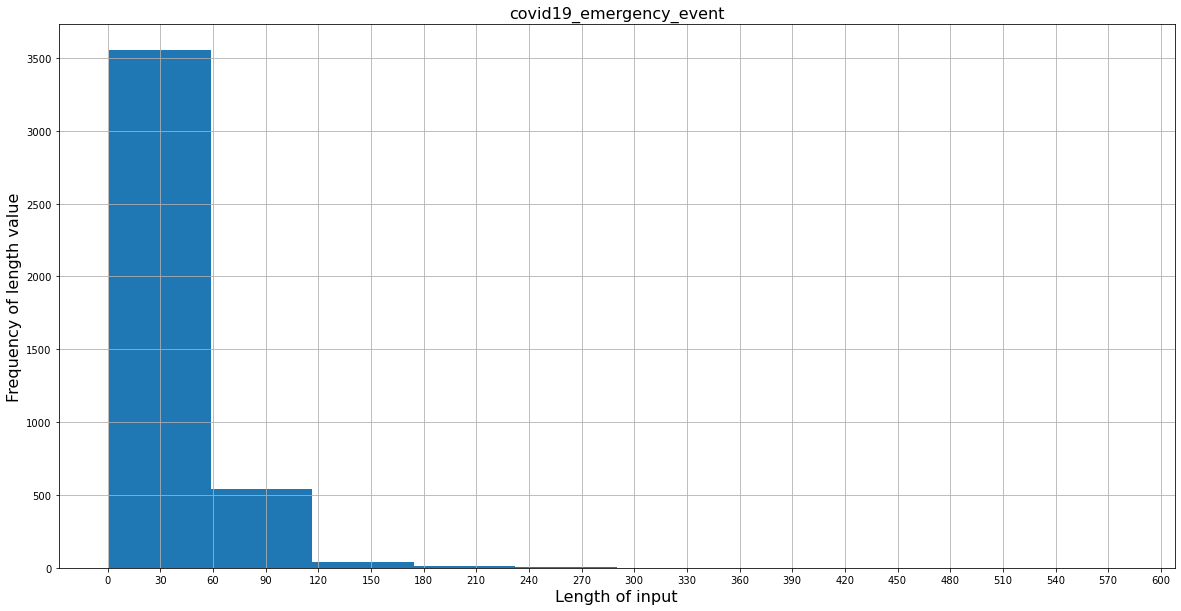

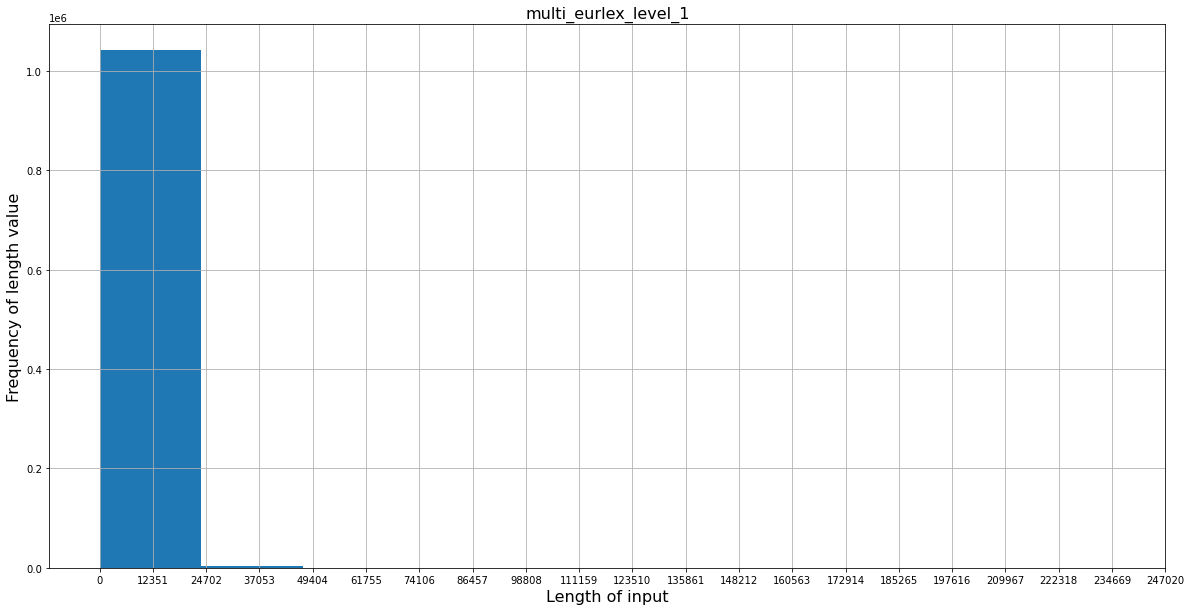

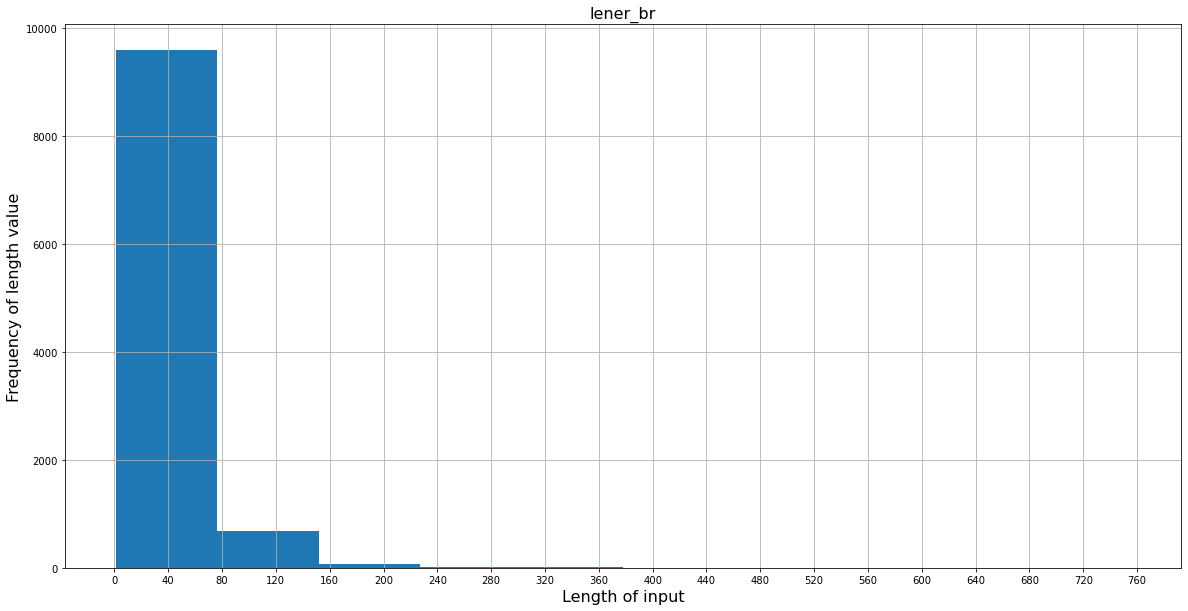

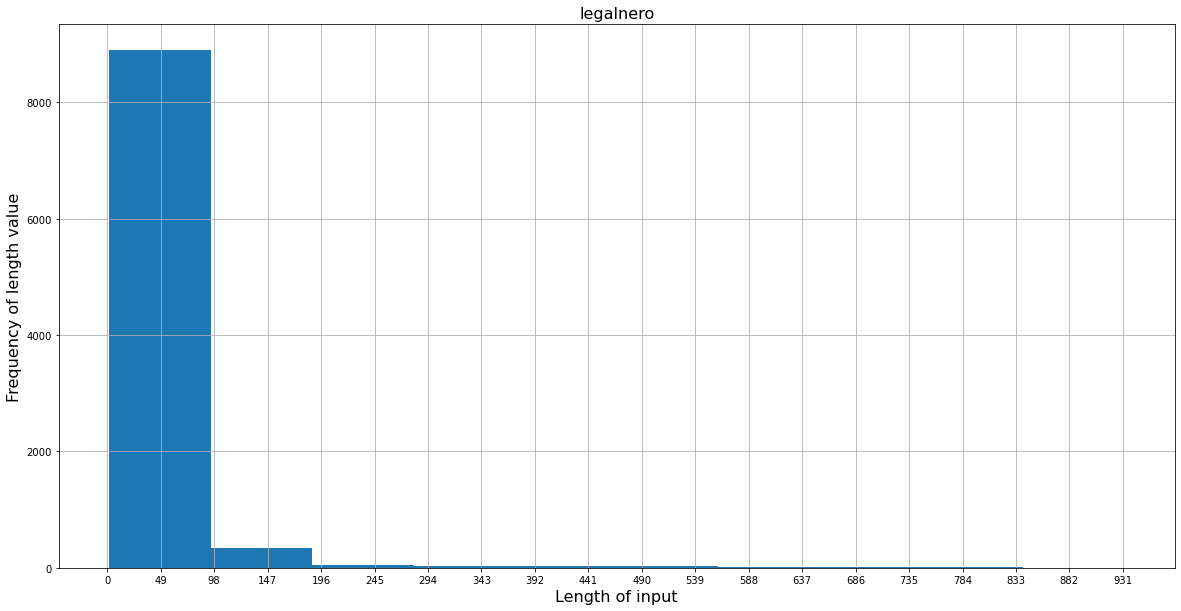

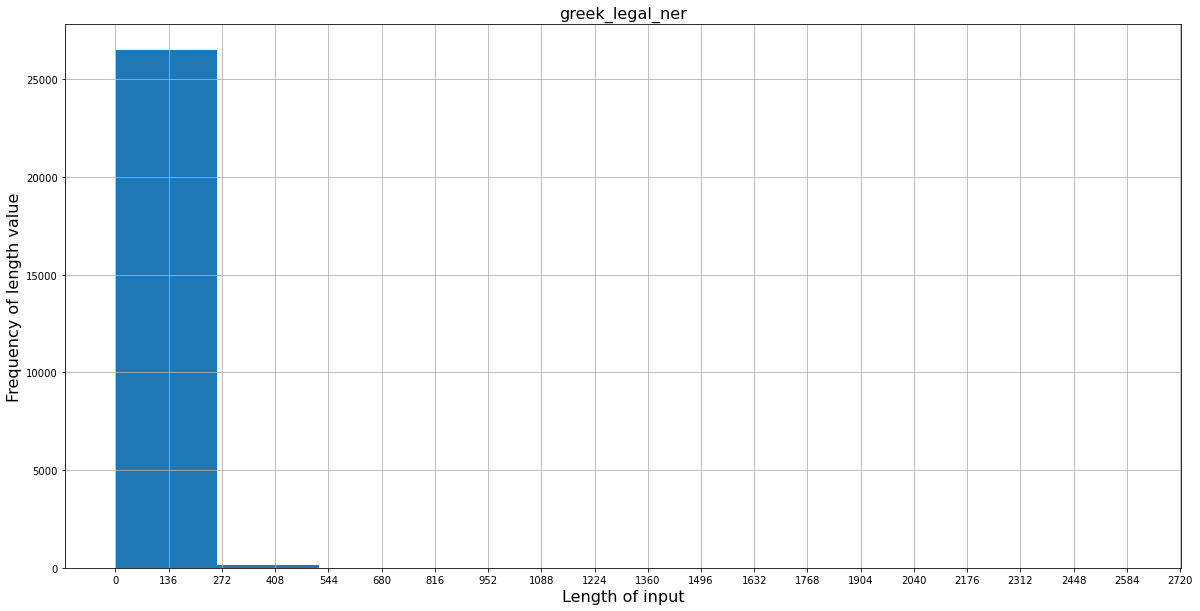

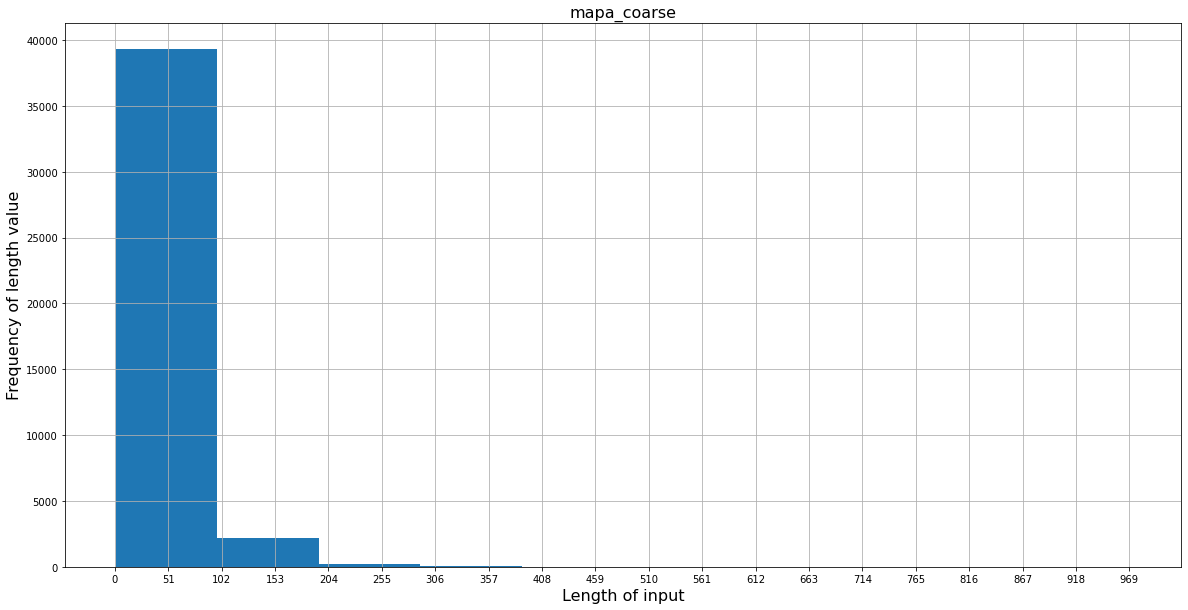

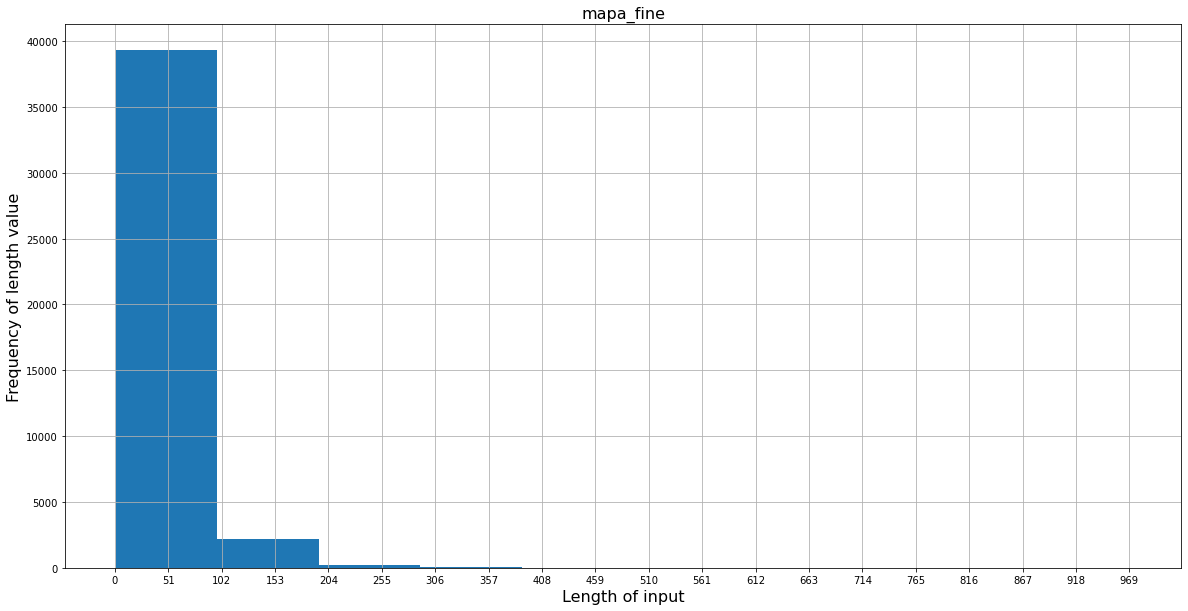

In [4]:
for ds in lextreme_datasets:
    create_histogram(ds)